# ModSim - Projeto 03 - Sonda Espacial Juno (Salto Orbital)

**Autor:** $Arthur\space Alegro\space de \space Oliveira$

## Importando bibliotecas:

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

## Equacionamento das forças atuantes em Juno:

* **Aceleração causada pela Força Gravitacional do Sol:**

$$a_{x_{sun-juno}}\space=\space -GP^2. M_{sol}.\frac{x_{juno}}{(x_{juno}^2\space+\space y_{juno}^2)^{\frac{3}{2}}}$$

$$a_{y_{sun-juno}}\space=\space-GP^2. M_{sol}.\frac{y_{juno}}{(x_{juno}^2\space+\space y_{juno}^2)^{\frac{3}{2}}}$$

* **Aceleração causada pela Força Gravitacional dos Planetas:**

$$a_{x_{planet-juno}}\space=\space GP^2. \frac{M_{planet}}{M_{sol}}.\frac{(x_{planet}\space-\space x_{juno})}{((x_{planet}-x_{juno})^2\space+(y_{planet}-y_{juno})^{2})^{3/2}}$$

$$a_{y_{planet-juno}}\space=\space GP^2. \frac{M_{planet}}{M_{sol}}.\frac{(y_{planet}\space-\space y_{juno})}{((x_{planet}-x_{juno})^2\space+(y_{planet}-y_{juno})^{2})^{3/2}}$$

$$a_{x_{juno}}\space=\space\sum_{i=1}^{n} a_{x_{i-juno}}$$

$$a_{y_{juno}}\space=\space\sum_{i=1}^{n} a_{y_{i-juno}}$$

## Dados Usados nas Simulações:

* **Constantes Astronômicas e de Conversão:**

In [8]:
# Constante de Gravitação Universal:
G = 6.67*10**(-11)  # m^(3).kg^(-1).s^(2)
# Unidades Astronômicas para conversão
UA = 149597870700   # m
P = 3.156*10**7     # s

* **Massa dos Planetas:**

In [3]:
# Massa Sol:
M_sol = 1.9891*10**30      # kg
# Massa dos planetas:
m_mercury = 3.3011*10**23  # kg
m_venus = 4.8685*10**24    # kg
m_earth = 5.9736*10**24    # kg
m_mars = 6.4174810**23     # kg
m_jupiter = 1.8986*10**27  # kg
m_saturn = 5.6846*10**26   # kg
m_uranus = 8.6810*10**25   # kg
m_neptune = 1.0243*10**26  # kg

* **Verificação da Aproximação de Constantes:**

In [4]:
print(4*math.pi**2)
print((G*M_sol*(P**2))/UA**3)

39.47841760435743
39.471188572568444


* **Distâncias Planeta-Sol:**

In [5]:
# Distâncias Periélio
dist_sun_merc = 46001200000/UA   # UA
dist_sun_ven = 107476000000/UA   # UA
dist_sun_ear = 147098290000/UA   # UA
dist_sun_mars = 227900000000/UA  # UA 
dist_sun_jup = 778500000000/UA   # UA
dist_sun_sat = 1353572956000/UA  # UA
dist_sun_ur = 2748938461000/UA   # UA
dist_sun_net = 4452940833000/UA  # UA
dist_sun_juno = 147098290000/UA  # UA

* **Velocidades Orbitais:**

In [6]:
Vorb_merc = 47.362*10**3/UA*P  # ano/UA
Vorb_ven = 35.02*10**3/UA*P    # ano/UA
Vorb_ear = 29.78*10**3/UA*P    # ano/UA
Vorb_mars = 24.077*10**3/UA*P  # ano/UA
Vorb_jup = 13.07*10**3/UA*P    # ano/UA
Vorb_sat = 9.69*10**3/UA*P     # ano/UA
Vorb_ur = 6.81*10**3/UA*P      # ano/UA
Vorb_net = 5.43*10**3/UA*P     # ano/UA

* **Períodos Orbitais:**

In [2]:
Porb_merc = 0.240       # ano
Porb_ven = 0.615198     # ano
Porb_ear = 1.000017421  # ano
Porb_mars = 1.8808      # ano
Porb_jup = 11.85920     # ano
Porb_sat = 29.4571      # ano
Porb_ur = 84.323326     # ano
Porb_net = 164.79       # ano

* **Condições Iniciais ($x_{0},\space y_{0},\space Vx_{0},\space Vy_{0}$):**

In [7]:
val_merc = [dist_sun_merc, 0, 0, Vorb_merc]
val_ven = [dist_sun_ven, 0, 0, Vorb_ven]
val_ear = [dist_sun_ear, 0, 0, Vorb_ear]
val_mars = [dist_sun_mars, 0, 0, Vorb_mars]
val_jup = [dist_sun_jup, 0, 0, Vorb_jup]
val_sat = [dist_sun_sat, 0, 0, Vorb_sat]
val_ur = [dist_sun_ur, 0, 0, Vorb_ur]
val_net = [dist_sun_net, 0, 0, Vorb_net]

## Simulação dos Planetas do Sistema Solar:

In [8]:
# Equações difereniais
def EqDif(val_init, t):
    # Valores iniciais:
    x = val_init[0]
    y = val_init[1]
    Vx = val_init[2]
    Vy = val_init[3]
    # Derivadas:
    dxdt = Vx
    dydt = Vy
    dVxdt = -4*math.pi**2*(x/(x**2 + y**2)**(3/2))
    dVydt = -4*math.pi**2*(y/(x**2 + y**2)**(3/2))
    return [dxdt, dydt, dVxdt, dVydt]
# Lista tempo
time = np.arange(0, 1000, 0.1)
# Integração Numérica
solution_mercury = odeint(EqDif, val_merc, time)
solution_venus = odeint(EqDif, val_ven, time)
solution_earth = odeint(EqDif, val_ear, time)
solution_mars = odeint(EqDif, val_mars, time)
solution_jupiter = odeint(EqDif, val_jup, time)
solution_saturn = odeint(EqDif, val_sat, time)
solution_uranus = odeint(EqDif, val_ur, time)
solution_neptune = odeint(EqDif, val_net, time)

### Modelagem de Mercúrio:

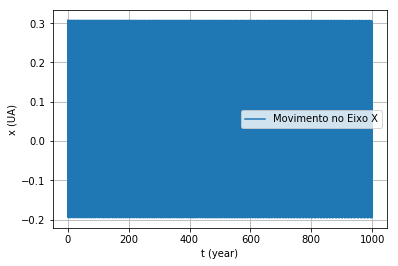

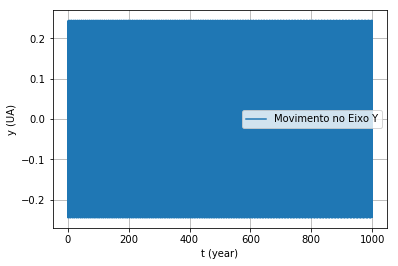

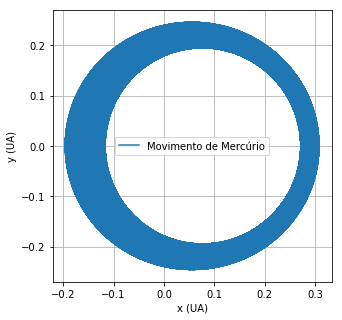

In [9]:
# Gerando interface gráfica
plt.plot(time, solution_mercury[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_mercury[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_mercury[:, 0], solution_mercury[:, 1], label='Movimento de Mercúrio')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Vênus:

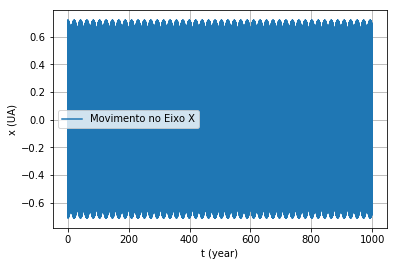

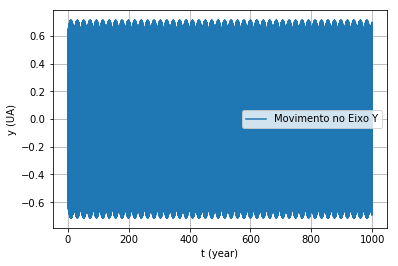

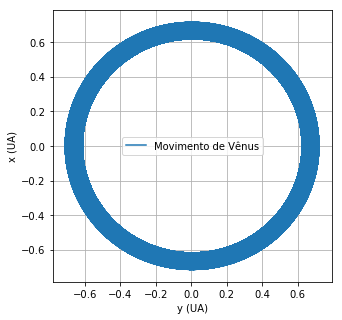

In [10]:
# Gerando interface gráfica
plt.plot(time, solution_venus[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_venus[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_venus[:, 0], solution_venus[:, 1], label='Movimento de Vênus')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem da Terra:

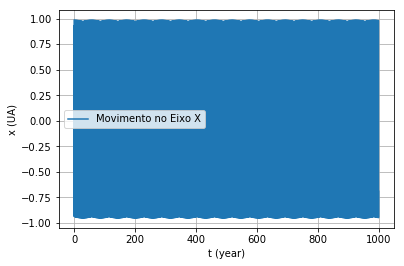

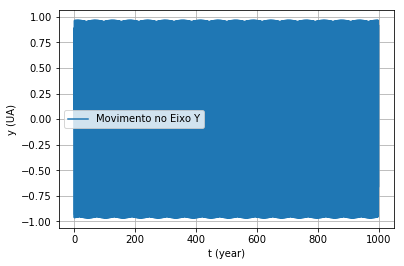

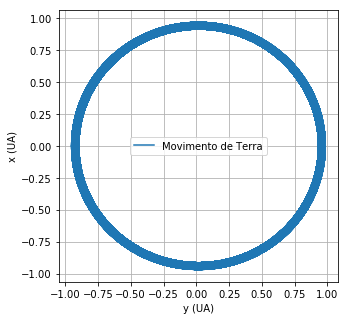

In [11]:
# Gerando interface gráfica
plt.plot(time, solution_earth[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_earth[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_earth[:, 0], solution_earth[:, 1], label='Movimento de Terra')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Marte:

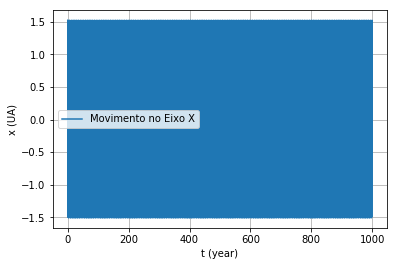

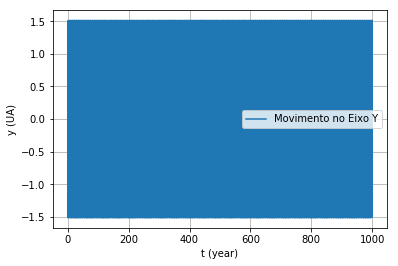

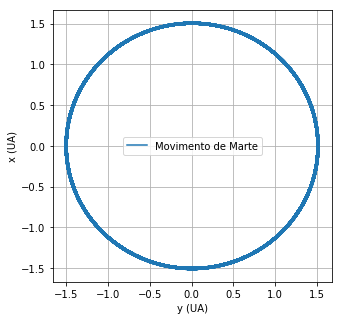

In [12]:
# Gerando interface gráfica
plt.plot(time, solution_mars[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_mars[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_mars[:, 0], solution_mars[:, 1], label='Movimento de Marte')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Júpiter:

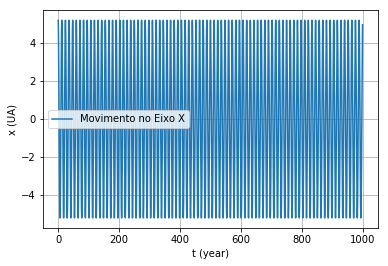

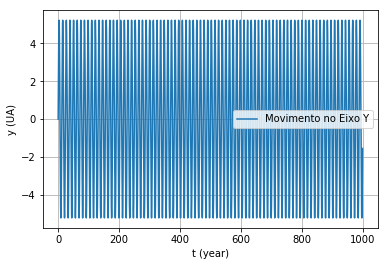

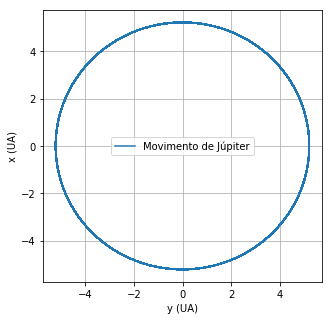

In [13]:
# Gerando interface gráfica
plt.plot(time, solution_jupiter[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_jupiter[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_jupiter[:, 0], solution_jupiter[:, 1], label='Movimento de Júpiter')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Saturno:

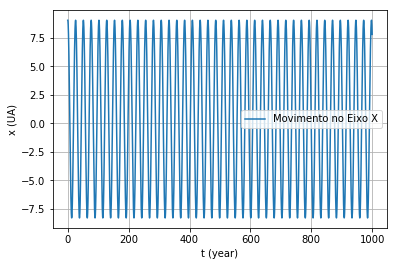

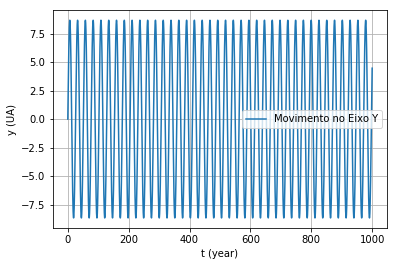

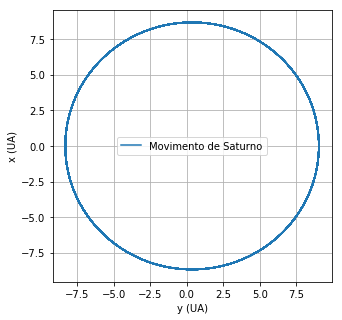

In [14]:
# Gerando interface gráfica
plt.plot(time, solution_saturn[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_saturn[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_saturn[:, 0], solution_saturn[:, 1], label='Movimento de Saturno')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Urano:

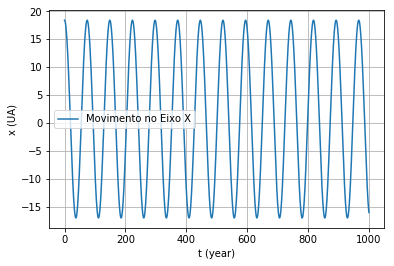

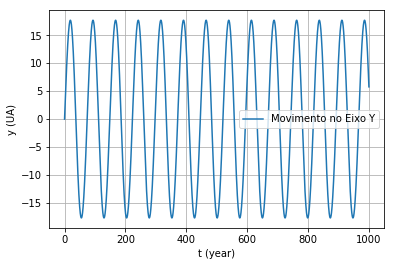

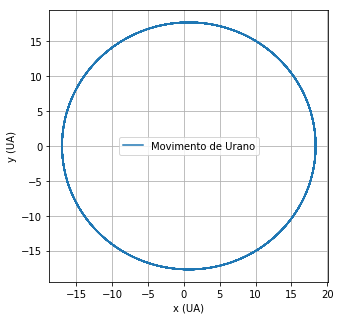

In [15]:
# Gerando interface gráfica
plt.plot(time, solution_uranus[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_uranus[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_uranus[:, 0], solution_uranus[:, 1], label='Movimento de Urano')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()

### Modelagem de Netuno:

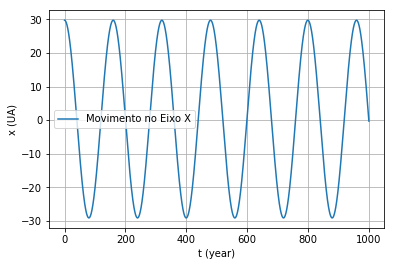

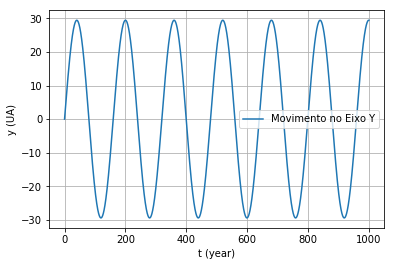

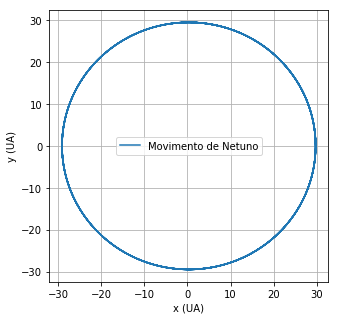

In [16]:
# Gerando interface gráfica
plt.plot(time, solution_neptune[:, 0], label='Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, solution_neptune[:, 1], label='Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_neptune[:, 0], solution_neptune[:, 1], label='Movimento de Netuno')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()

## Simluação do Sistema Solar Completo:

* **Cores referentes a cada planeta:**

In [17]:
color_mercury = '#FAE005'
color_venus = '#FA8F05'
color_earth = '#057CFA'
color_mars = '#FB180A'
color_jupiter = '#A90AFB'
color_saturn = '#5AFB0A'
color_uranus = '#FB0AE6'
color_neptune = '#0AF4FB'

* **Gerando Interface Gráfica:**

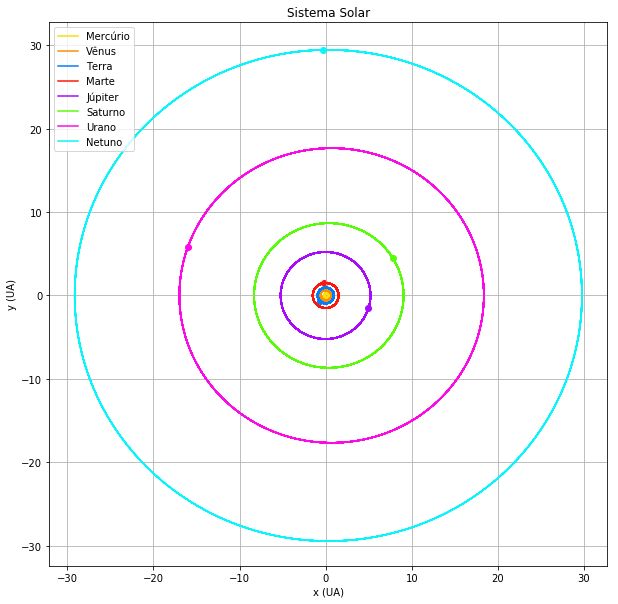

In [18]:
# Redimensionando para um gráfico quadrado:
plt.figure(figsize = (10, 10))
# Orbitas planetárias:
plt.plot(solution_mercury[:, 0], solution_mercury[:, 1], label='Mercúrio', color=color_mercury)
plt.plot(solution_venus[:, 0], solution_venus[:, 1], label='Vênus', color=color_venus)
plt.plot(solution_earth[:, 0], solution_earth[:, 1], label='Terra', color=color_earth)
plt.plot(solution_mars[:, 0], solution_mars[:, 1], label='Marte', color=color_mars)
plt.plot(solution_jupiter[:, 0], solution_jupiter[:, 1], label='Júpiter', color=color_jupiter)
plt.plot(solution_saturn[:, 0], solution_saturn[:, 1], label='Saturno', color=color_saturn)
plt.plot(solution_uranus[:, 0], solution_uranus[:, 1], label='Urano', color=color_uranus)
plt.plot(solution_neptune[:, 0], solution_neptune[:, 1], label='Netuno', color=color_neptune)
# Posição pós-simulação dos planetas:
plt.scatter(solution_mercury[-1, 0], solution_mercury[-1,1], color=color_mercury)
plt.scatter(solution_venus[-1, 0], solution_venus[-1,1], color=color_venus)
plt.scatter(solution_earth[-1, 0], solution_earth[-1,1], color=color_earth)
plt.scatter(solution_mars[-1, 0], solution_mars[-1,1], color=color_mars)
plt.scatter(solution_jupiter[-1, 0], solution_jupiter[-1,1], color=color_jupiter)
plt.scatter(solution_saturn[-1, 0], solution_saturn[-1,1], color=color_saturn)
plt.scatter(solution_uranus[-1, 0], solution_uranus[-1,1], color=color_uranus)
plt.scatter(solution_neptune[-1, 0], solution_neptune[-1,1], color=color_neptune)
# Melhorias de exibição:
plt.title('Sistema Solar')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()

## Simulação da Sonda Juno:

### **Valores Retornados Pós-Simulação Planetária:**

In [19]:
planets_new_values = [
solution_mercury[-1, 0], solution_mercury[-1, 1], solution_mercury[-1, 2], solution_mercury[-1, 3],
solution_venus[-1, 0], solution_venus[-1, 1], solution_venus[-1, 2], solution_venus[-1, 3], 
solution_earth[-1, 0], solution_earth[-1, 1], solution_earth[-1, 2], solution_earth[-1, 3], 
solution_mars[-1, 0], solution_mars[-1, 1], solution_mars[-1, 2], solution_mars[-1, 3], 
solution_jupiter[-1, 0], solution_jupiter[-1, 1], solution_jupiter[-1, 2], solution_jupiter[-1, 3], 
solution_saturn[-1, 0], solution_saturn[-1, 1], solution_saturn[-1, 2], solution_saturn[-1, 3], 
solution_uranus[-1, 0], solution_uranus[-1, 1], solution_uranus[-1, 2], solution_uranus[-1, 3], 
solution_neptune[-1, 0], solution_neptune[-1, 1], solution_neptune[-1, 2], solution_neptune[-1, 3]
]
print("planets_new_values possui {} elementos".format(len(planets_new_values)))

planets_new_values possui 32 elementos


### **Velocidade Orbital de Juno:**

* **Stage 01 (Atlas CBB):**

In [20]:
Vorb_stage1 = 3313 # m/s

* **Stage 02 (Centaur):**

In [21]:
Vorb_stage2 = 4418 # m/s

* **Boosters (AJ-60A):**

In [22]:
Vorb_boosters = 1*2739 # m/s

* **Juno:**

In [23]:
# Calculando velocidade orbital de Juno
Vorb_juno = (Vorb_stage1 + Vorb_stage2 + Vorb_boosters)/UA*P + Vorb_ear
Vorb_juno_x = -Vorb_juno*((solution_earth[-1, 0])*((solution_earth[-1, 0]**2 + solution_earth[-1, 1]**2)**(1/2)))
Vorb_juno_y = Vorb_juno*((solution_earth[-1, 1])*((solution_earth[-1, 0]**2 + solution_earth[-1, 1]**2)**(1/2)))
# Adicionando valores de Juno na lista de valores iniciais:
planets_new_values.append(solution_earth[-1, 0])
planets_new_values.append(solution_earth[-1, 1])
planets_new_values.append(Vorb_juno_x)
planets_new_values.append(Vorb_juno_y)
print(Vorb_juno)
print(Vorb_juno_x)
print(Vorb_juno_y)

8.491364175546384
5.59943180638
-5.34748875832


In [24]:
# Condições iniciais [x0, y0, Vx0, Vy0]                 INDEX
init_values = [dist_sun_merc, 0, 0, Vorb_merc,     #  0  1  2  3 
               dist_sun_ven, 0, 0, Vorb_ven,       #  4  5  6  7
               dist_sun_ear, 0, 0, Vorb_ear,       #  8  9 10 11
               dist_sun_mars, 0, 0, Vorb_mars,     # 12 13 14 15
               dist_sun_jup, 0, 0, Vorb_jup,       # 16 17 18 19
               dist_sun_sat, 0, 0, Vorb_sat,       # 20 21 22 23
               dist_sun_ur, 0, 0, Vorb_ur,         # 24 25 26 27 
               dist_sun_net, 0, 0, Vorb_net,       # 28 29 30 31 
               dist_sun_juno, 0, 0, Vorb_juno]     # 32 33 34 35

# Equações difereniais
def EqDif_Juno(val_init, t):
    # MERCÚRIO:
    # Valores iniciais:
    x_merc = val_init[0]
    y_merc = val_init[1]
    Vx_merc = val_init[2]
    Vy_merc = val_init[3]
    # Derivadas:
    dxdt_merc = Vx_merc
    dydt_merc = Vy_merc
    dVxdt_merc = -((G*(P**2)*M_sol)/UA**3)*(x_merc/(x_merc**2 + y_merc**2)**(3/2))
    dVydt_merc = -((G*(P**2)*M_sol)/UA**3)*(y_merc/(x_merc**2 + y_merc**2)**(3/2))      
    # VÊNUS:
    # Valores iniciais:
    x_ven = val_init[4]
    y_ven = val_init[5]
    Vx_ven = val_init[6]
    Vy_ven = val_init[7]
    # Derivadas:
    dxdt_ven = Vx_ven
    dydt_ven = Vy_ven
    dVxdt_ven = -((G*(P**2)*M_sol)/UA**3)*(x_ven/(x_ven**2 + y_ven**2)**(3/2))
    dVydt_ven = -((G*(P**2)*M_sol)/UA**3)*(y_ven/(x_ven**2 + y_ven**2)**(3/2))  
    # TERRA:
    # Valores iniciais:
    x_ear = val_init[8]
    y_ear = val_init[9]
    Vx_ear = val_init[10]
    Vy_ear = val_init[11]
    # Derivadas:
    dxdt_ear = Vx_ear
    dydt_ear = Vy_ear
    dVxdt_ear = -((G*(P**2)*M_sol)/UA**3)*(x_ear/(x_ear**2 + y_ear**2)**(3/2))
    dVydt_ear = -((G*(P**2)*M_sol)/UA**3)*(y_ear/(x_ear**2 + y_ear**2)**(3/2))
    # MARTE:
    # Valores iniciais:
    x_mars = val_init[12]
    y_mars = val_init[13]
    Vx_mars = val_init[14]
    Vy_mars = val_init[15]
    # Derivadas:
    dxdt_mars = Vx_mars
    dydt_mars = Vy_mars
    dVxdt_mars = -((G*(P**2)*M_sol)/UA**3)*(x_mars/(x_mars**2 + y_mars**2)**(3/2))
    dVydt_mars = -((G*(P**2)*M_sol)/UA**3)*(y_mars/(x_mars**2 + y_mars**2)**(3/2))    
    # JÚPITER:
    # Valores iniciais:
    x_jup = val_init[16]
    y_jup = val_init[17]
    Vx_jup = val_init[18]
    Vy_jup = val_init[19]
    # Derivadas:
    dxdt_jup = Vx_jup
    dydt_jup = Vy_jup
    dVxdt_jup = -((G*(P**2)*M_sol)/UA**3)*(x_jup/(x_jup**2 + y_jup**2)**(3/2))
    dVydt_jup = -((G*(P**2)*M_sol)/UA**3)*(y_jup/(x_jup**2 + y_jup**2)**(3/2))    
    # SATURNO:
    # Valores iniciais:
    x_sat = val_init[20]
    y_sat = val_init[21]
    Vx_sat = val_init[22]
    Vy_sat = val_init[23]
    # Derivadas:
    dxdt_sat = Vx_sat
    dydt_sat = Vy_sat
    dVxdt_sat = -((G*(P**2)*M_sol)/UA**3)*(x_sat/(x_sat**2 + y_sat**2)**(3/2))
    dVydt_sat = -((G*(P**2)*M_sol)/UA**3)*(y_sat/(x_sat**2 + y_sat**2)**(3/2))    
    # URANO:
    # Valores iniciais:
    x_ur = val_init[24]
    y_ur = val_init[25]
    Vx_ur = val_init[26]
    Vy_ur = val_init[27]
    # Derivadas:
    dxdt_ur = Vx_ur
    dydt_ur = Vy_ur
    dVxdt_ur = -((G*(P**2)*M_sol)/UA**3)*(x_ur/(x_ur**2 + y_ur**2)**(3/2))
    dVydt_ur = -((G*(P**2)*M_sol)/UA**3)*(y_ur/(x_ur**2 + y_ur**2)**(3/2))    
    # NETUNO:
    # Valores iniciais:
    x_net = val_init[28]
    y_net = val_init[29]
    Vx_net = val_init[30]
    Vy_net = val_init[31]
    # Derivadas:
    dxdt_net = Vx_net
    dydt_net = Vy_net
    dVxdt_net = -((G*(P**2)*M_sol)/UA**3)*(x_net/(x_net**2 + y_net**2)**(3/2))
    dVydt_net = -((G*(P**2)*M_sol)/UA**3)*(y_net/(x_net**2 + y_net**2)**(3/2))
    
    # JUNO:
    # Valores iniciais:
    x_juno = val_init[32]
    y_juno = val_init[33]
    Vx_juno = val_init[34]
    Vy_juno = val_init[35]
    # Derivadas:
    dxdt_juno = Vx_juno
    dydt_juno = Vy_juno

# EIXO X:
    dVxdt_juno_sun = - ((G*(P**2)*M_sol)/UA**3)*(x_juno/(x_juno**2 + y_juno**2)**(3/2))
    dVxdt_juno_mercury = - ((G*(P**2)*M_sol)/UA**3)*(m_mercury/M_sol)*((x_merc - x_juno)/((x_merc - x_juno)**2 + (x_merc - y_juno)**2)**(3/2))
    dVxdt_juno_venus = - ((G*(P**2)*M_sol)/UA**3)*(m_venus/M_sol)*((x_ven - x_juno)/((x_ven - x_juno)**2 + (x_ven - y_juno)**2)**(3/2))
    dVxdt_juno_earth = ((G*(P**2)*M_sol)/UA**3)*(m_earth/M_sol)*((x_ear - x_juno)/((x_ear - x_juno)**2 + (x_ear - y_juno)**2)**(3/2))
    dVxdt_juno_mars = ((G*(P**2)*M_sol)/UA**3)*(m_mars/M_sol)*((x_mars - x_juno)/((x_mars - x_juno)**2 + (x_mars - y_juno)**2)**(3/2))
    dVxdt_juno_jupiter = ((G*(P**2)*M_sol)/UA**3)*(m_jupiter/M_sol)*((x_jup - x_juno)/((x_jup - x_juno)**2 + (x_jup - y_juno)**2)**(3/2))
    dVxdt_juno_saturn = ((G*(P**2)*M_sol)/UA**3)*(m_saturn/M_sol)*((x_sat - x_juno)/((x_sat - x_juno)**2 + (x_sat - y_juno)**2)**(3/2))
    dVxdt_juno_uranus = ((G*(P**2)*M_sol)/UA**3)*(m_uranus/M_sol)*((x_ur - x_juno)/((x_ur - x_juno)**2 + (x_ur - y_juno)**2)**(3/2))
    dVxdt_juno_neptune = ((G*(P**2)*M_sol)/UA**3)*(m_neptune/M_sol)*((x_net - x_juno)/((x_net - x_juno)**2 + (x_net - y_juno)**2)**(3/2))  
# EIXO Y:
    dVydt_juno_sun = - ((G*(P**2)*M_sol)/UA**3)*(y_juno/(x_juno**2 + y_juno**2)**(3/2))
    dVydt_juno_mercury = - ((G*(P**2)*M_sol)/UA**3)*(m_mercury/M_sol)*((y_merc - y_juno)/((x_merc - x_juno)**2 + (x_merc - y_juno)**2)**(3/2))
    dVydt_juno_venus = - ((G*(P**2)*M_sol)/UA**3)*(m_venus/M_sol)*((y_ven - y_juno)/((x_ven - x_juno)**2 + (x_ven - y_juno)**2)**(3/2))
    dVydt_juno_earth = - ((G*(P**2)*M_sol)/UA**3)*(m_earth/M_sol)*((y_ear - y_juno)/((x_ear - x_juno)**2 + (x_ear - y_juno)**2)**(3/2))
    dVydt_juno_mars = ((G*(P**2)*M_sol)/UA**3)*(m_mars/M_sol)*((y_mars - y_juno)/((x_mars - x_juno)**2 + (x_mars - y_juno)**2)**(3/2))
    dVydt_juno_jupiter = ((G*(P**2)*M_sol)/UA**3)*(m_jupiter/M_sol)*((y_jup - y_juno)/((x_jup - x_juno)**2 + (x_jup - y_juno)**2)**(3/2))
    dVydt_juno_saturn = ((G*(P**2)*M_sol)/UA**3)*(m_saturn/M_sol)*((y_sat - y_juno)/((x_sat - x_juno)**2 + (x_sat - y_juno)**2)**(3/2))
    dVydt_juno_uranus = ((G*(P**2)*M_sol)/UA**3)*(m_uranus/M_sol)*((y_ur - y_juno)/((x_ur - x_juno)**2 + (x_ur - y_juno)**2)**(3/2))
    dVydt_juno_neptune = ((G*(P**2)*M_sol)/UA**3)*(m_neptune/M_sol)*((y_net - y_juno)/((x_net - x_juno)**2 + (x_net - y_juno)**2)**(3/2))

    dVxdt_juno = dVxdt_juno_sun + dVxdt_juno_mercury + dVxdt_juno_venus + dVxdt_juno_earth + dVxdt_juno_mars + dVxdt_juno_jupiter + dVxdt_juno_saturn + dVxdt_juno_uranus + dVxdt_juno_neptune
    dVydt_juno = dVydt_juno_sun + dVydt_juno_mercury + dVydt_juno_venus + dVydt_juno_earth + dVydt_juno_mars + dVydt_juno_jupiter + dVydt_juno_saturn + dVydt_juno_uranus + dVydt_juno_neptune
    
    # Retorno dos dados:   
    return [dxdt_merc, dydt_merc, dVxdt_merc, dVydt_merc,
            dxdt_ven, dydt_ven, dVxdt_ven, dVydt_ven,
            dxdt_ear, dydt_ear, dVxdt_ear, dVydt_ear,
            dxdt_mars, dydt_mars, dVxdt_mars, dVydt_mars,
            dxdt_jup, dydt_jup, dVxdt_jup, dVydt_jup,
            dxdt_sat, dydt_sat, dVxdt_sat, dVydt_sat,
            dxdt_ur, dydt_ur, dVxdt_ur, dVydt_ur,
            dxdt_net, dydt_net, dVxdt_net, dVydt_net,
            dxdt_juno, dydt_juno, dVxdt_juno, dVydt_juno]
# Lista tempo:
time = np.arange(0, 5, 0.001)
# Integração Numérica:
solution_juno = odeint(EqDif_Juno, planets_new_values, time)

* **Checagem da Simulação Planetária:**

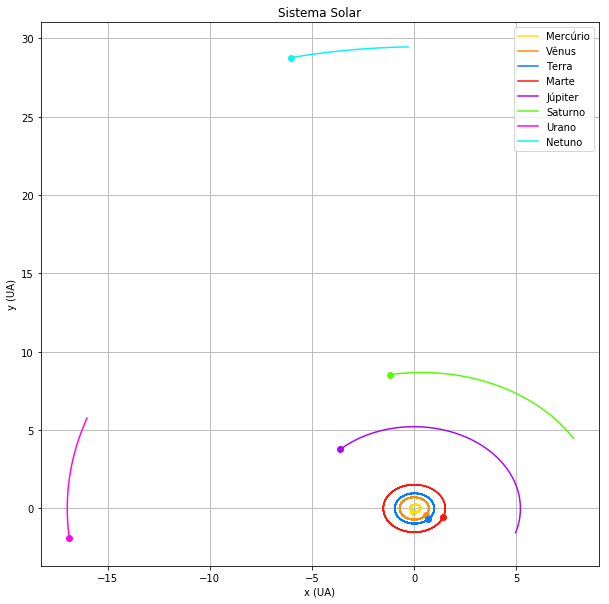

In [25]:
# Redimensionando para um gráfico quadrado:
plt.figure(figsize = (10, 10))
# Orbitas planetárias:
plt.plot(solution_juno[:, 0],  solution_juno[:, 1], label='Mercúrio', color=color_mercury)
plt.plot(solution_juno[:, 4],  solution_juno[:, 5], label='Vênus', color=color_venus)
plt.plot(solution_juno[:, 8],  solution_juno[:, 9], label='Terra', color=color_earth)
plt.plot(solution_juno[:, 12], solution_juno[:, 13], label='Marte', color=color_mars)
plt.plot(solution_juno[:, 16], solution_juno[:, 17], label='Júpiter', color=color_jupiter)
plt.plot(solution_juno[:, 20], solution_juno[:, 21], label='Saturno', color=color_saturn)
plt.plot(solution_juno[:, 24], solution_juno[:, 25], label='Urano', color=color_uranus)
plt.plot(solution_juno[:, 28], solution_juno[:, 29], label='Netuno', color=color_neptune)
# Posição pós-simulação dos planetas:
plt.scatter(solution_juno[-1, 0], solution_juno[-1,1], color=color_mercury)
plt.scatter(solution_juno[-1, 4], solution_juno[-1,5], color=color_venus)
plt.scatter(solution_juno[-1, 8], solution_juno[-1,9], color=color_earth)
plt.scatter(solution_juno[-1, 12], solution_juno[-1,13], color=color_mars)
plt.scatter(solution_juno[-1, 16], solution_juno[-1,17], color=color_jupiter)
plt.scatter(solution_juno[-1, 20], solution_juno[-1,21], color=color_saturn)
plt.scatter(solution_juno[-1, 24], solution_juno[-1,25], color=color_uranus)
plt.scatter(solution_juno[-1, 28], solution_juno[-1,29], color=color_neptune)
# Melhorias de exibição:
plt.title('Sistema Solar')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
plt.show()

## Simulação de Juno

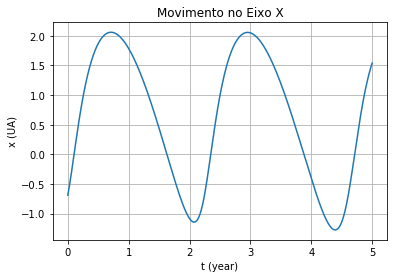

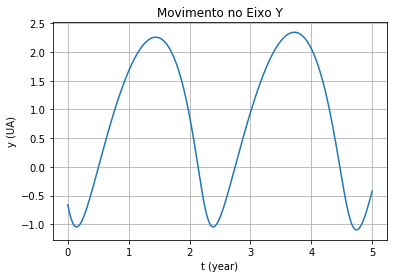

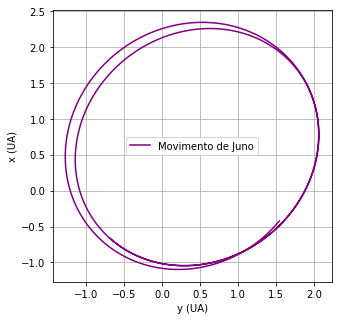

In [26]:
# Gerando interface gráfica
plt.plot(time, solution_juno[:, 32])
plt.title('Movimento no Eixo X')
plt.xlabel('t (year)')
plt.ylabel('x (UA)')
plt.grid()
plt.show()
plt.plot(time, solution_juno[:, 33])
plt.title('Movimento no Eixo Y')
plt.xlabel('t (year)')
plt.ylabel('y (UA)')
plt.grid()
plt.show()
plt.figure(figsize = (5, 5))
plt.plot(solution_juno[:, 32], solution_juno[:, 33], label='Movimento de Juno', color='purple')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

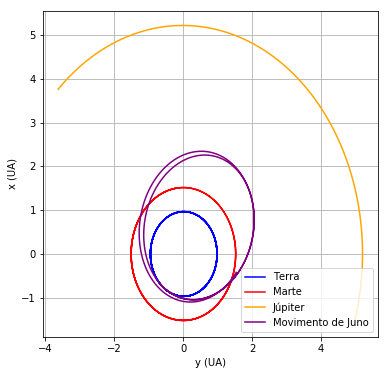

In [27]:
plt.figure(figsize=(6, 6))
plt.plot(solution_juno[:, 8], solution_juno[:, 9], label='Terra', color='blue')
plt.plot(solution_juno[:, 12], solution_juno[:, 13], label='Marte', color='red')
plt.plot(solution_juno[:, 16], solution_juno[:, 17], label='Júpiter', color='orange')
plt.plot(solution_juno[:, 32], solution_juno[:, 33], label='Movimento de Juno', color='purple')
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

## Validação do FlyBy:

* **Trajetória Terra e Juno:**

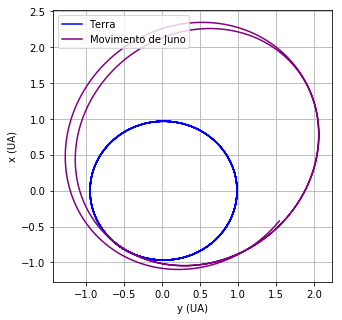

In [36]:
plt.figure(figsize=(5, 5))
plt.plot(solution_juno[:, 8], solution_juno[:, 9], label='Terra', color='blue', animated=True)
plt.plot(solution_juno[:, 32], solution_juno[:, 33], label='Movimento de Juno', color='purple', animated=True)
plt.xlabel('y (UA)')
plt.ylabel('x (UA)')
plt.legend()
plt.grid()
plt.show()

* **Análise da Distância entre Terra e Juno:**

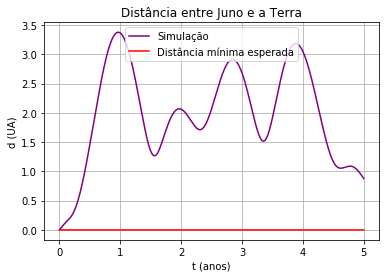

In [40]:
juno_xpos = solution_juno[:, 32]
juno_ypos = solution_juno[:, 33]
earth_xpos = solution_juno[:, 8]
earth_ypos = solution_juno[:, 9]
juno_earth_real_distance = 500000/UA  # UA
juno_earth_real_distance_array = [juno_earth_real_distance]*len(time)
dist_juno_earth = np.array(((juno_xpos - earth_xpos)**2 + (juno_ypos - earth_ypos)**2)**(1/2))
plt.plot(time, dist_juno_earth, label='Simulação', color='purple')
plt.plot(time, juno_earth_real_distance_array, label='Distância mínima esperada', color='red')
plt.title('Distância entre Juno e a Terra')
plt.xlabel('t (anos)')
plt.ylabel('d (UA)')
plt.legend()
plt.grid()
plt.show()

* **Análise da Velocidade Orbital de Juno:**

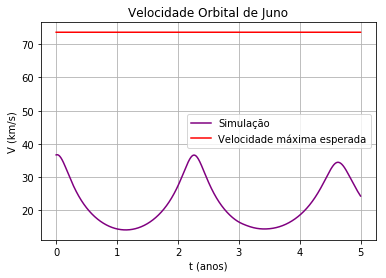

In [42]:
juno_xvelocity =  solution_juno[:, 34]*UA/P/1000 # km/s
juno_yvelocity =  solution_juno[:, 35]*UA/P/1000 # km/s
juno_real_velocity = 265000/3600                 # km/s
juno_real_velocity_array = [juno_real_velocity]*len(time)
juno_velocity = (juno_xvelocity**2 + juno_yvelocity**2)**(1/2)
plt.plot(time, juno_velocity, label='Simulação', color='purple')
plt.plot(time, juno_real_velocity_array, label='Velocidade máxima esperada', color='red')
plt.title('Velocidade Orbital de Juno')
plt.xlabel('t (anos)')
plt.ylabel('V (km/s)')
plt.legend()
plt.grid()
plt.show()

## Validação do Sistema Planetário:

* **Contagem de Translações Planetárias (Simulação):**

In [33]:
def orbital_cycle_simulation(planet_solution):
    cycle_count = 0
    val_list = planet_solution[:,1]
    for i in range( len(val_list) - 1):
        if val_list[i+1] >= 0 and val_list[i] < 0:
            cycle_count += 1
    return cycle_count

In [34]:
orbital_cycle_simulation_list = [
orbital_cycle_simulation(solution_mercury),
orbital_cycle_simulation(solution_venus),
orbital_cycle_simulation(solution_earth),
orbital_cycle_simulation(solution_mars),
orbital_cycle_simulation(solution_jupiter),
orbital_cycle_simulation(solution_saturn),
orbital_cycle_simulation(solution_uranus),
orbital_cycle_simulation(solution_neptune),
]
print(orbital_cycle_simulation_list)

[2073, 1658, 1051, 535, 83, 39, 13, 6]


* **Contagem de Translações Planetárias (Real):**

In [4]:
def orbital_cycle_real(time, P_orb):
    n_orbits = int(1*time/P_orb)
    return n_orbits

In [6]:
orbital_cycle_real_list = [
orbital_cycle_real(1000, Porb_merc),
orbital_cycle_real(1000, Porb_ven),
orbital_cycle_real(1000, Porb_ear),
orbital_cycle_real(1000, Porb_mars),
orbital_cycle_real(1000, Porb_jup),
orbital_cycle_real(1000, Porb_sat),
orbital_cycle_real(1000, Porb_ur),
orbital_cycle_real(1000, Porb_net),
]
print(orbital_cycle_real_list)

[4166, 1625, 999, 531, 84, 33, 11, 6]


In [13]:
proportion1 = 2.3*UA/12742000 # m
proportion2 = 5.204267*UA/12742000 # m
proportion3 = 500/12742000/1000 # mm
print(proportion1)
print(proportion2)
print(proportion3)

27003.225758122742
61100.868133281816
3.924030764401193e-08
